### Carregar os dados

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import math


In [7]:
dataset = pd.read_csv('dataset.csv')
display(dataset.head())
display(dataset.tail())


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


### Verificando se os dados precisarão de algum tratamento antes de iniciar nossa análise

In [10]:
dataset['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [12]:
dataset[dataset.duplicated()] #Verificando valores duplicados

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [43]:
dataset.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### Qual a cidade com maior valor de vanda de produtos a Categorai 'Office Supplies'


In [42]:
# Filtrar as vendas de 'Office Supplies'
vendas_office = dataset[dataset['Categoria'] == 'Office Supplies']
vendas_agrupadas = vendas_office.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False)
print(vendas_agrupadas.head(1))


Cidade
New York City    68362.814
Name: Valor_Venda, dtype: float64


### Qual o tatal de vendas por data do pedido?

In [41]:
total_vendas_por_data = dataset.groupby('Data_Pedido')['Valor_Venda'].sum()
df_total_vendas = total_vendas_por_data.reset_index(name='Total_Vendas')
df_total_vendas = df_total_vendas.sort_values('Data_Pedido')

df_total_vendas


,Data_Pedido,Total_Vendas
0,2015-01-03,16.4480
1,2015-01-04,288.0600
2,2015-01-05,19.5360
3,2015-01-06,4407.1000
4,2015-01-07,87.1580
...,...,...
1221,2018-12-26,814.5940
1222,2018-12-27,177.6360
1223,2018-12-28,1657.3508
1224,2018-12-29,2915.5340


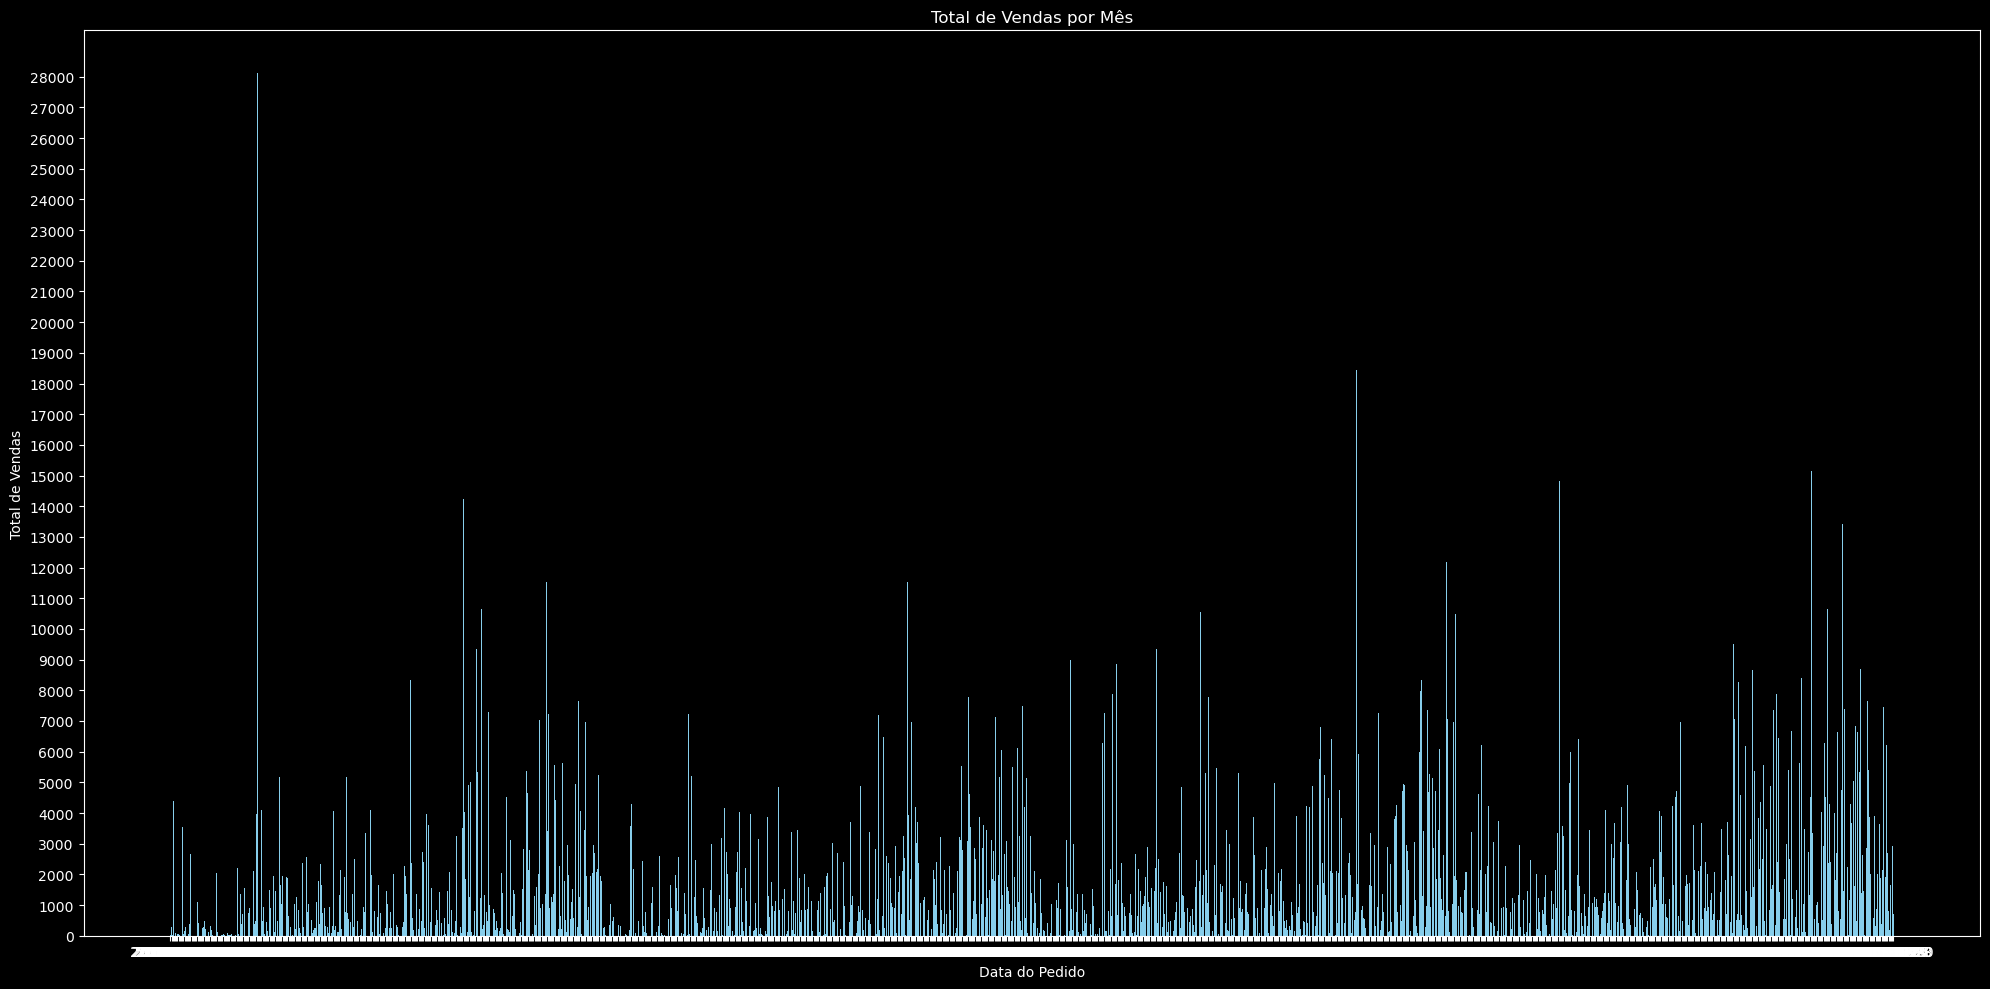

In [74]:
dataset['Data_Pedido'] = pd.to_datetime(dataset['Data_Pedido'], dayfirst=True)
total_vendas_por_data = dataset.groupby('Data_Pedido')['Valor_Venda'].sum() # Agrupar por data e somar as vendas

# Resetar o índice e ordenar por data
df_total_vendas = total_vendas_por_data.reset_index(name='Total_Vendas')
df_total_vendas = df_total_vendas.sort_values('Data_Pedido')

total_vendas = dataset.groupby(pd.Grouper(key='Data_Pedido', freq='d'))['Valor_Venda'].sum()
df_total_vendas_dia = total_vendas.reset_index(name='Total_Vendas')
fig, ax = plt.subplots(figsize=(20, 10))  # Aumentar o tamanho da figura

ax.bar(df_total_vendas_dia['Data_Pedido'].dt.strftime('%Y-%m-%d'), df_total_vendas_dia['Total_Vendas'], color='skyblue')

# Configurações dos eixos
ax.set_xlabel('Data do Pedido')
ax.set_ylabel('Total de Vendas')
ax.set_title('Total de Vendas por Mês')

plt.yticks(range(0, math.ceil(df_total_vendas_dia['Total_Vendas'].max()) + 1, 1000))

plt.tight_layout()
plt.show()


/var/folders/b2/c0s56lws0jd0_f1fqzvc0nrh0000gn/T/ipykernel_67722/2839057878.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_vendas_por_mes = dataset.groupby(pd.Grouper(key='Data_Pedido', freq='M'))['Valor_Venda'].sum()


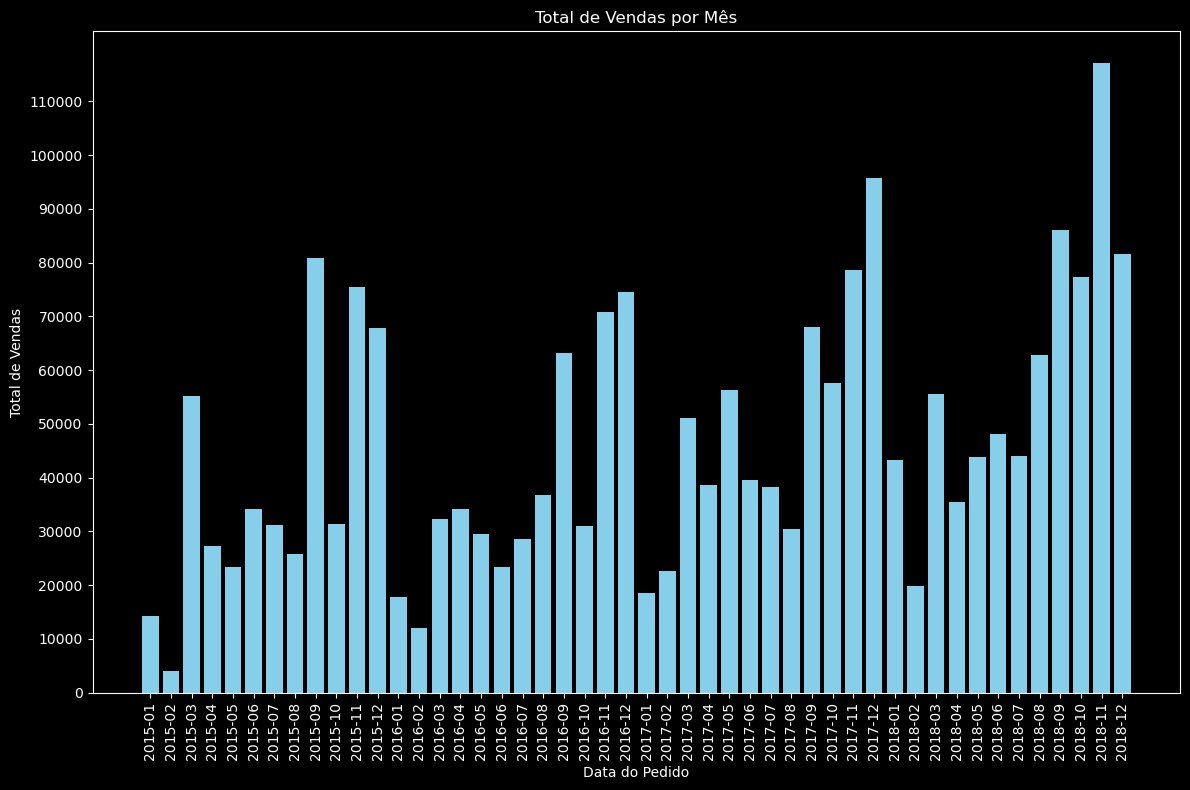

In [72]:
dataset['Data_Pedido'] = pd.to_datetime(dataset['Data_Pedido'], dayfirst=True)

total_vendas_por_data = dataset.groupby('Data_Pedido')['Valor_Venda'].sum()
df_total_vendas = total_vendas_por_data.reset_index(name='Total_Vendas')
df_total_vendas = df_total_vendas.sort_values('Data_Pedido')
total_vendas_por_mes = dataset.groupby(pd.Grouper(key='Data_Pedido', freq='M'))['Valor_Venda'].sum()
df_total_vendas_mes = total_vendas_por_mes.reset_index(name='Total_Vendas')
fig, ax = plt.subplots(figsize=(12, 8))  # Aumentar o tamanho da figura

ax.bar(df_total_vendas_mes['Data_Pedido'].dt.strftime('%Y-%m'), df_total_vendas_mes['Total_Vendas'], color='skyblue')

# Configurações dos eixos
ax.set_xlabel('Data do Pedido')
ax.set_ylabel('Total de Vendas')
ax.set_title('Total de Vendas por Mês')

plt.yticks(range(0, math.ceil(df_total_vendas_mes['Total_Vendas'].max()) + 1, 10000))
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


### Qual o Total de Vendas por Estado?

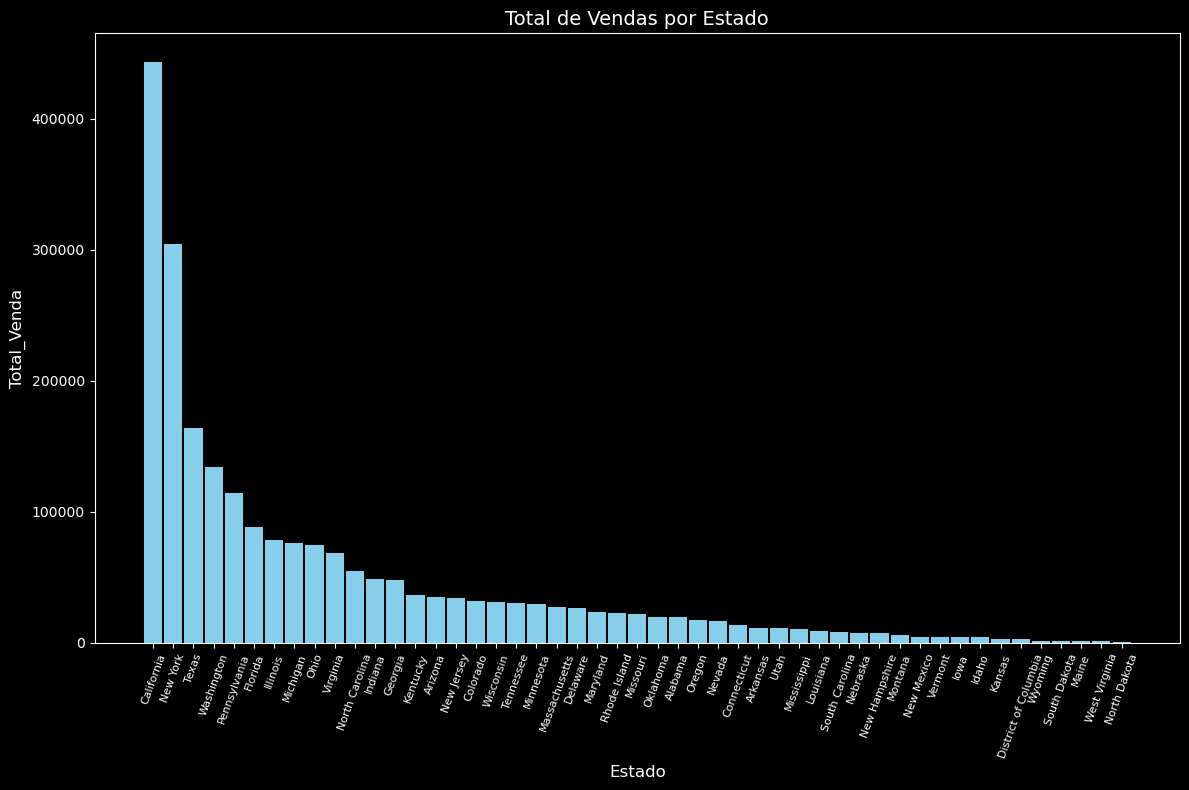

In [102]:
def total_vendas_cidade():
    vendas_por_estados  = dataset.groupby('Estado')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)
    vendas_por_estados.columns = ['Estado', 'Total_Venda']
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.bar(vendas_por_estados['Estado'], vendas_por_estados['Total_Venda'], color='skyblue', width=0.9)
    
    ax.set_xlabel('Estado', fontsize=12)
    ax.set_ylabel('Total_Venda', fontsize=12)
    ax.set_title('Total de Vendas por Estado', fontsize=14)
    
   
    plt.xticks(rotation=70)  # Ajustar os rótulos do eixo x para melhor visualização
    ax.tick_params(axis='x', labelsize=8)
    
    plt.tight_layout()
    plt.show()
total_vendas_cidade()

### Quais São as 10 Cidades com Maior Total de Vendas?

In [96]:
vendas_por_estados = dataset.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False).head(10)
vendas_por_estados

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


            Cidade  Valor_Venda
327  New York City  251749.2190
265    Los Angeles  171654.6330
450        Seattle  114725.4780
436  San Francisco  107489.9520
372   Philadelphia  107197.8030
207        Houston   61590.1868
435      San Diego   47458.3790
80         Chicago   46974.3430
216   Jacksonville   44713.1830
123        Detroit   42446.9440


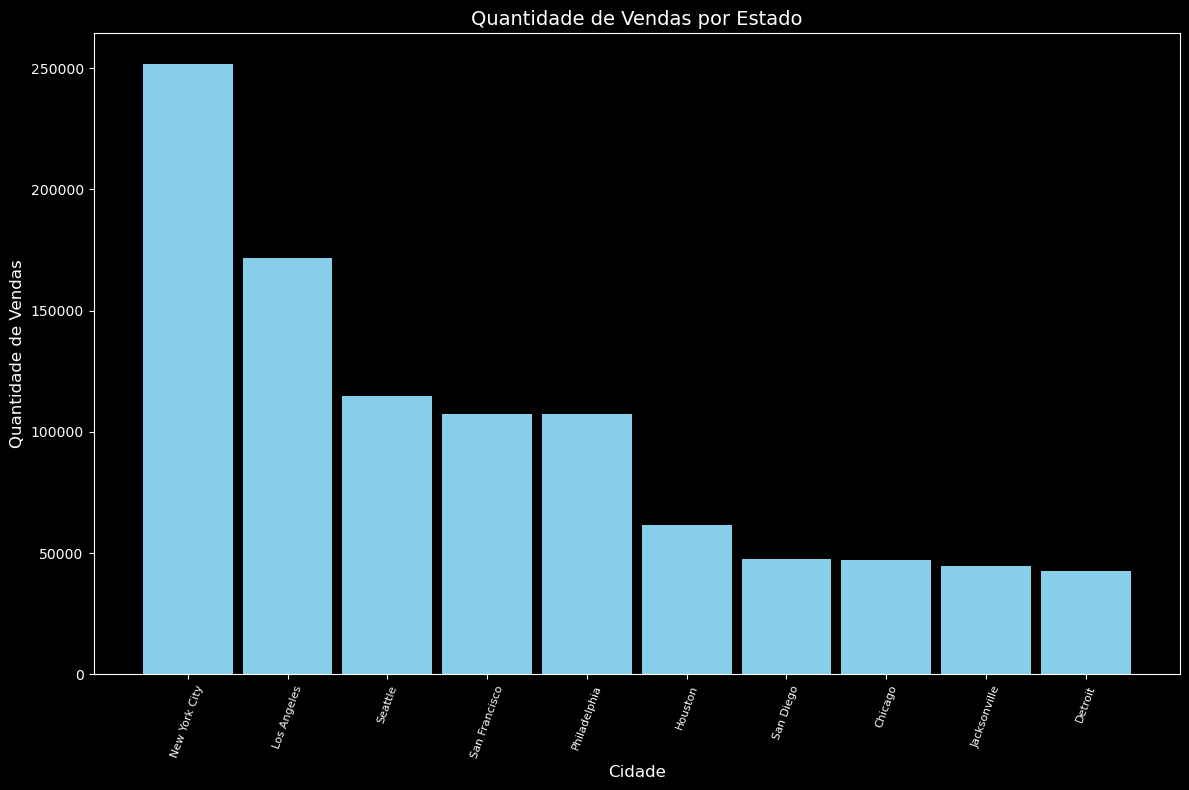

In [103]:
def total_vendas_cidade_top_10():
    vendas_por_estados = dataset.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False).head(10)
    vendas_por_estados.columns = ['Cidade', 'Quantidade_Vendas']
    
    # Plotar o gráfico de barras
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Ajustar a largura das barras
    ax.bar(vendas_por_estados['Cidade'], vendas_por_estados['Quantidade_Vendas'], color='skyblue', width=0.9)
    
    # Configurações dos eixos
    ax.set_xlabel('Cidade', fontsize=12)
    ax.set_ylabel('Quantidade de Vendas', fontsize=12)
    ax.set_title('Quantidade de Vendas por Estado', fontsize=14)
    
    # Ajustar os rótulos do eixo x para melhor visualização
    plt.xticks(rotation=70)
    ax.tick_params(axis='x', labelsize=8)
    
    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()
print(vendas_por_estados)
total_vendas_cidade_top_10()


In [67]:
dataset['Segmento'].value_counts()

Segmento
Consumer       5039
Corporate      2930
Home Office    1731
Name: count, dtype: int64

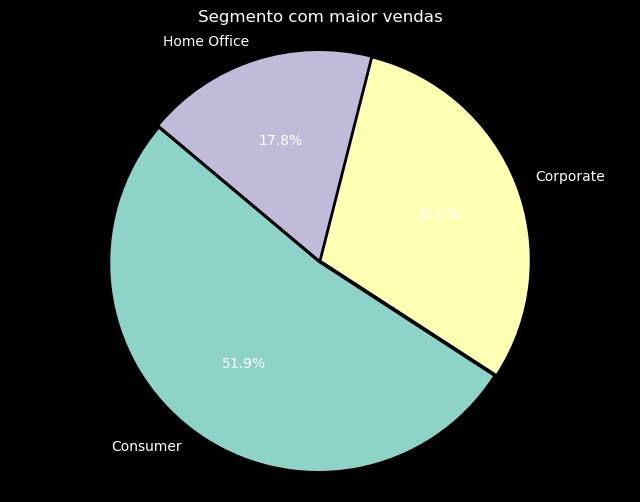

In [68]:
import matplotlib.pyplot as plt

# Dados fornecidos
overall_ratios = dataset['Segmento'].value_counts()
labels = overall_ratios.index
sizes = overall_ratios.values
explode = [0.01, 0.01, 0.01]  # Para destacar o primeiro segmento

# Criação do gráfico de pizza
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo

plt.title('Segmento com maior vendas')
plt.show()


### Qual o Total de Vendas Por Segmento e Por Ano?


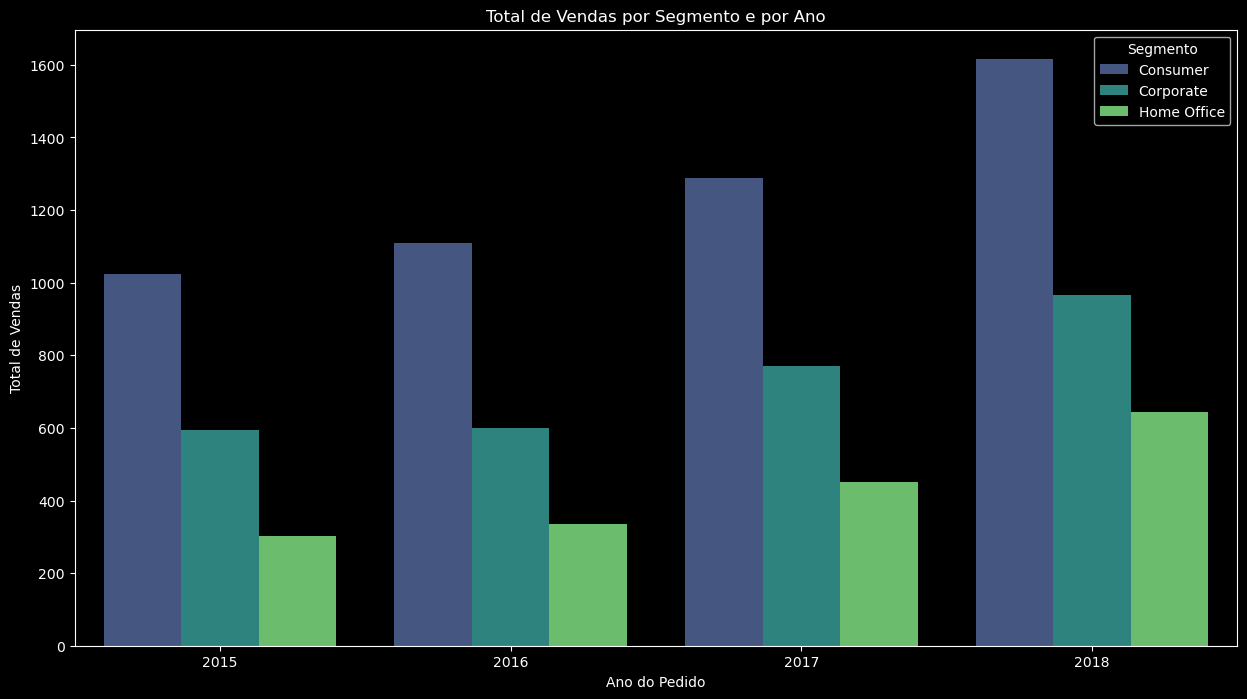

In [69]:

# Converter a coluna 'Data_Pedido' para datetime, assumindo formato 'dd/mm/yyyy'
dataset['Data_Pedido'] = pd.to_datetime(dataset['Data_Pedido'], dayfirst=True)

# Agrupar por ano e segmento e contar o número de vendas
total_vendas_por_ano_segmento = dataset.groupby([dataset['Data_Pedido'].dt.year, 'Segmento']).size().reset_index(name='Total_Vendas')

# Renomear a coluna para clareza
total_vendas_por_ano_segmento.rename(columns={'Data_Pedido': 'Ano'}, inplace=True)

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=total_vendas_por_ano_segmento, x='Ano', y='Total_Vendas', hue='Segmento', palette='viridis')

# Configurações dos eixos e título
ax.set_xlabel('Ano do Pedido')
ax.set_ylabel('Total de Vendas')
ax.set_title('Total de Vendas por Segmento e por Ano')
plt.legend(title='Segmento')

# Mostrar o gráfico
plt.show()


# Pergunta de Negócio 7 (Desafio Nível Júnior):

Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.

- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.Quantas Vendas Receberiam 15% de Desconto?

In [70]:
for valor in dataset['Valor_Venda']:
    if valor > 1000:
        dataset['desconto'] = dataset['Valor_Venda'] - (dataset['Valor_Venda'] * 0.15)
    else:
        dataset['desconto'] = dataset['Valor_Venda'] - (dataset['Valor_Venda'] * 0.1)
dataset
        

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,20.13120
...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,20.54700
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,48.88800
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,177.09840
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,3.25800
